<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage, PIL, numpy

import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import utm
import geopandas as gpd
import pandas as pd
import gdal#, osr, os

ImportError: dlopen(/Users/karinepetrus/anaconda3/lib/python3.7/site-packages/osgeo/_gdal.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libgif.7.dylib
  Referenced from: /Users/karinepetrus/anaconda3/lib/libgdal.20.dylib
  Reason: image not found

In [35]:
test = Image.open('DiffClasses/dc_07.tif')
test_HSV = test.convert('HSV')
matrice = (np.array(test_HSV))
h = pd.DataFrame(np.ravel(matrice[:,:,0]))
s = pd.DataFrame(np.ravel(matrice[:,:,1]))
v = pd.DataFrame(np.ravel(matrice[:,:,2]))



FileNotFoundError: [Errno 2] No such file or directory: 'DiffClasses/dc_07.tif'

In [8]:
img = matrice
vectorized = img.reshape((-1,3))

# convert to np.float32
vectorized = np.float32(vectorized)

K = 2
attempts=10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

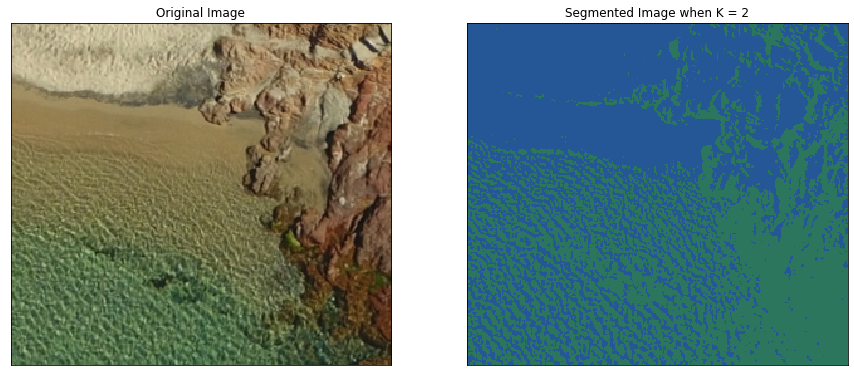

In [12]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(test)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
def segmentation(test,i):
    #test = img #Image.open('DiffClasses/dc_07.tif')
    test_HSV = test.convert('HSV')
    matrice = (np.array(test_HSV))
    h = pd.DataFrame(np.ravel(matrice[:,:,0]))
    s = pd.DataFrame(np.ravel(matrice[:,:,1]))
    v = pd.DataFrame(np.ravel(matrice[:,:,2]))
    img = matrice
    vectorized = img.reshape((-1,3))
    # convert to np.float32
    vectorized = np.float32(vectorized)
    K = 2
    attempts=10
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    plt.clf()
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(test)
    plt.title('Original Image'+str(img)), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.savefig('segmentation de '+str(i)+'.png')
    plt.show()
    return result_image, 

In [30]:
test_HSV = test.convert('HSV')
raster = gdal.Open(test_HSV)
band = raster.GetRasterBand(1)
array = band.ReadAsArray()

NameError: name 'gdal' is not defined

In [ ]:

def raster2array(rasterfn):
    raster = gdal.Open(rasterfn)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array


In [20]:
print(os.getcwd())

/Users/karinepetrus/Desktop/image_processing/DiffClasses


<Figure size 432x288 with 0 Axes>

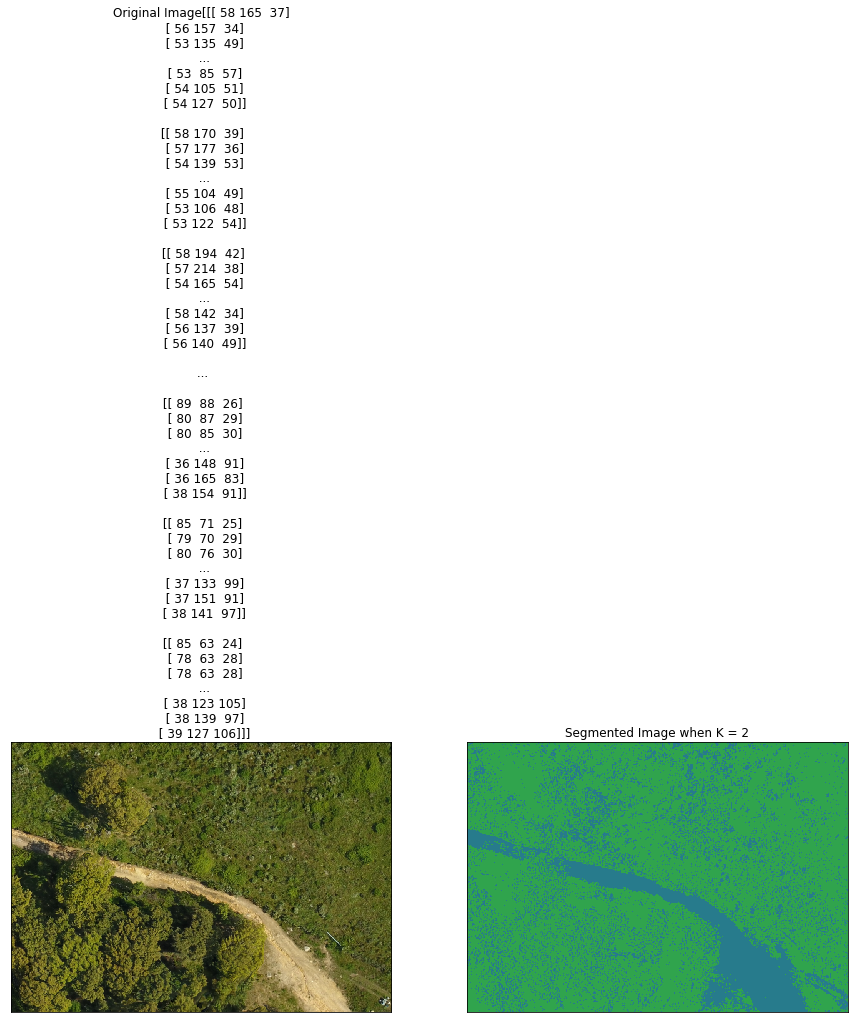

<Figure size 432x288 with 0 Axes>

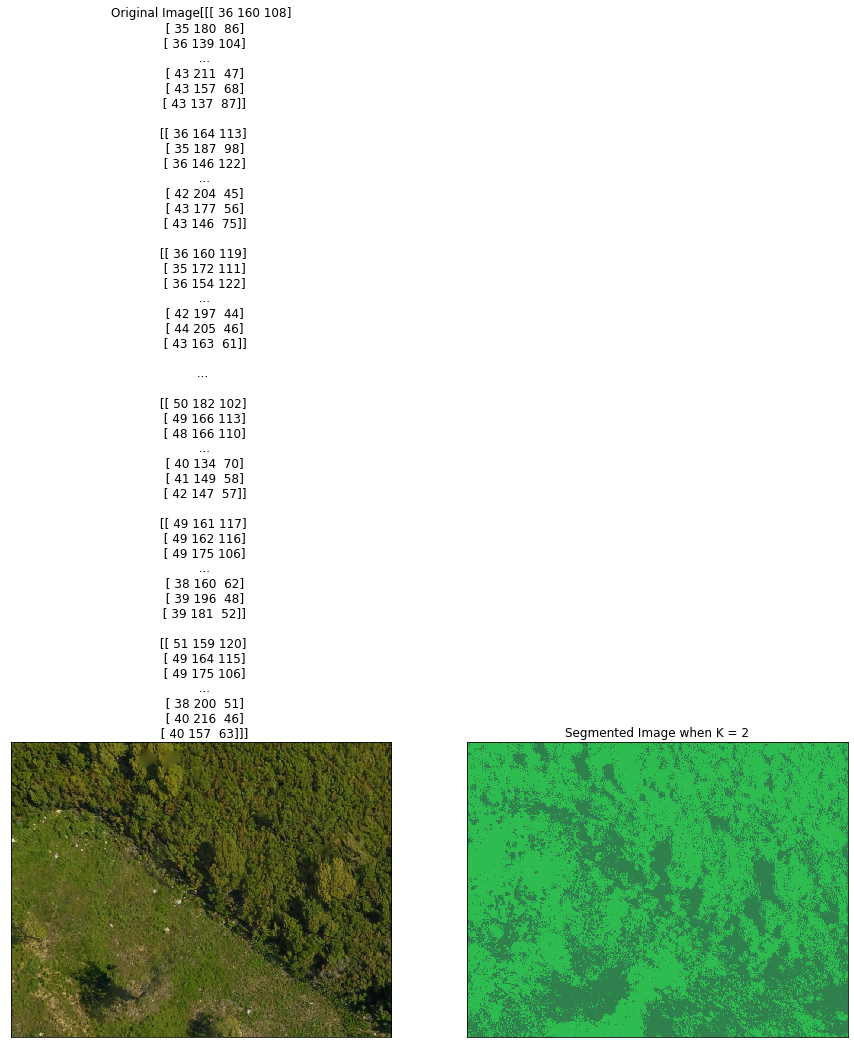

<Figure size 432x288 with 0 Axes>

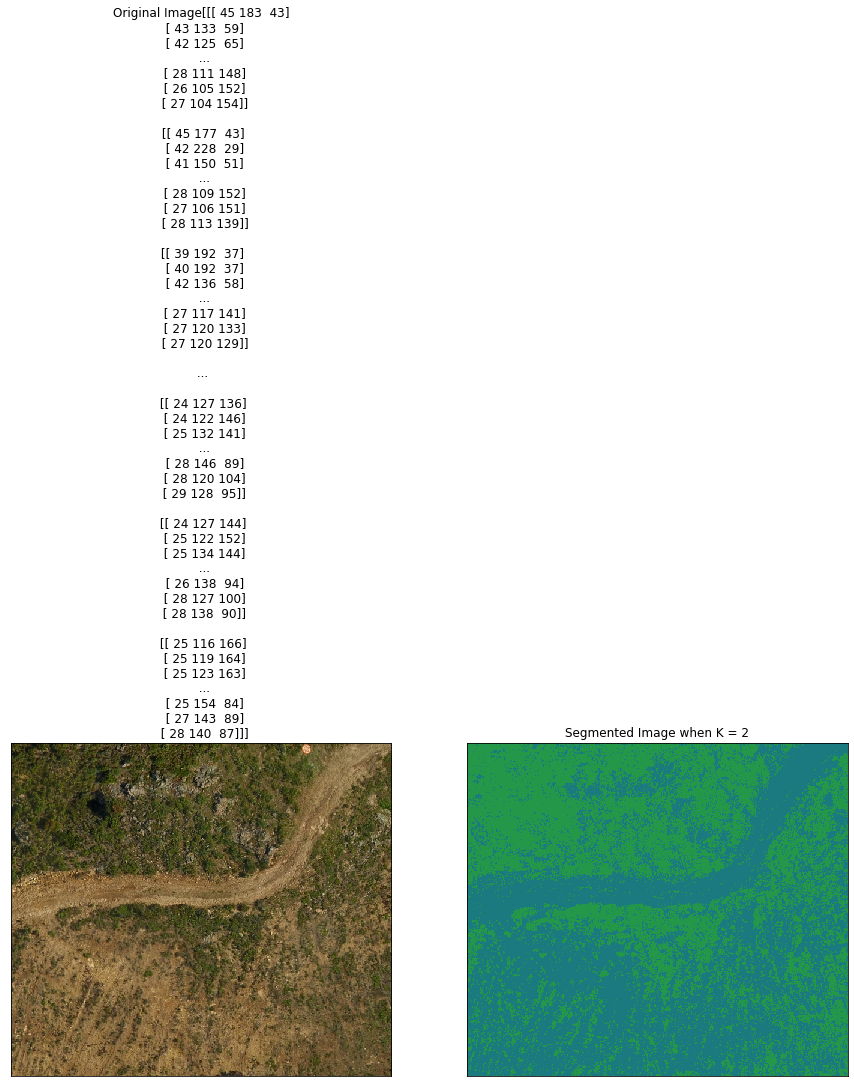

<Figure size 432x288 with 0 Axes>

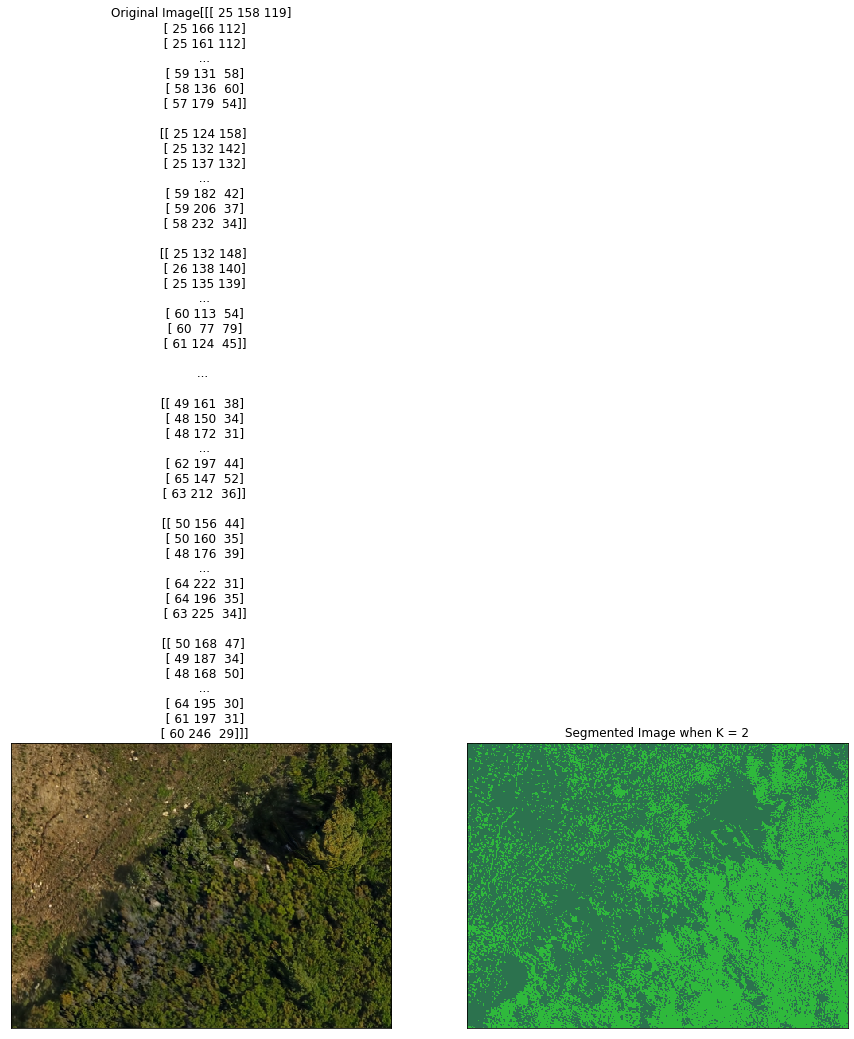

<Figure size 432x288 with 0 Axes>

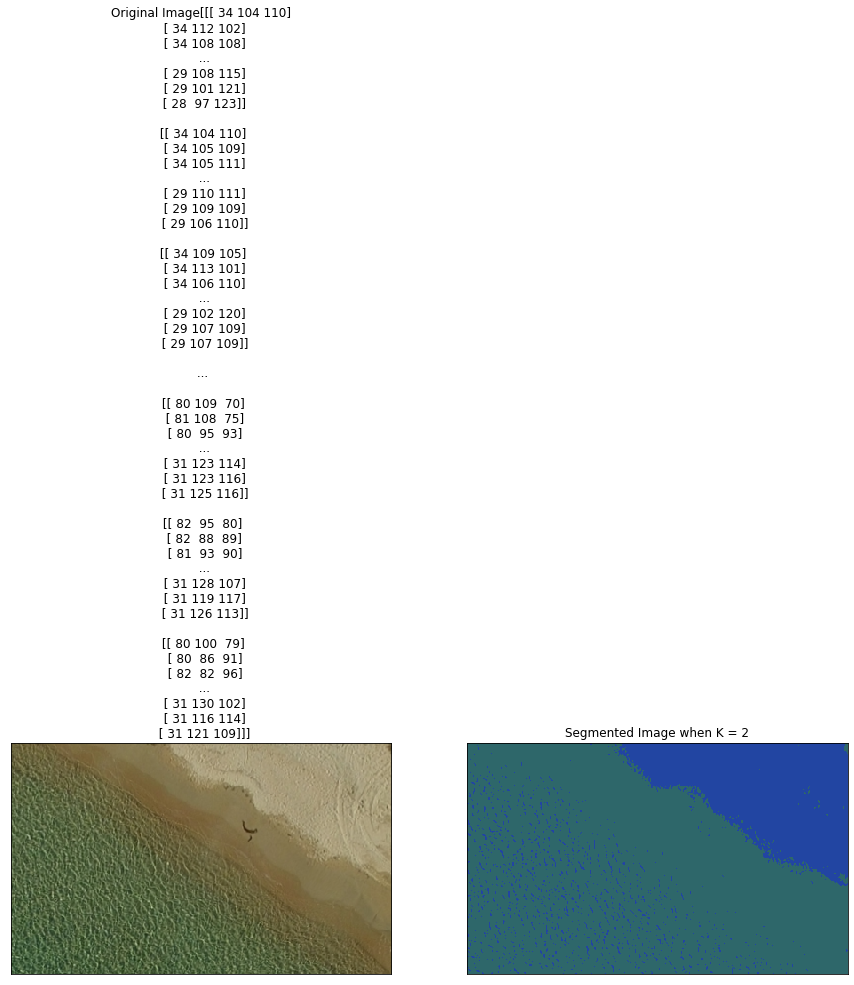

<Figure size 432x288 with 0 Axes>

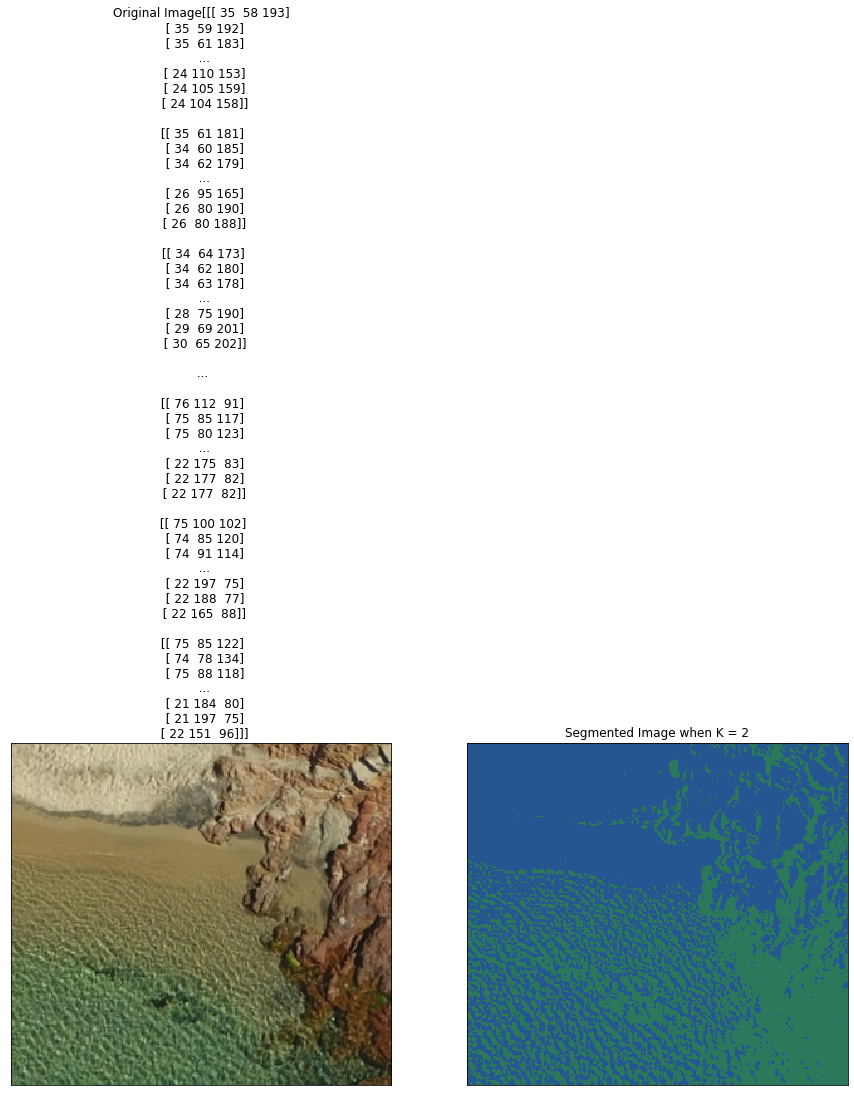

In [28]:
import os

for i in range(1,7):
    nom = 'dc_0'+str(i)+'.tif'
    os.chdir('/Users/karinepetrus/Desktop/image_processing/DiffClasses')
    im = Image.open(nom)
    os.chdir('/Users/karinepetrus/Desktop/image_processing')
    segmentation(im,i)
   